In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
import json
import numpy as np

In [37]:
with open('../Results/pf.json', 'r') as fp:
    data = json.load(fp)

In [41]:
colors = [(39,64,139),(0,128,128),(31, 119, 180), (44, 160, 44), (152, 223, 138), (174, 199, 232),
          (255, 127, 14), (255, 187, 120),(214, 39, 40), (255, 152, 150), (148, 103, 189), (197, 176, 213)]

for i in range(len(colors)):
    r, g, b = colors[i]
    colors[i] = (r / 255., g / 255., b / 255.)

# modifying parameters for plot
from math import sqrt
golden_mean = (sqrt(5)-1.0)/2.0 #used for size=
fig_width = 6 # fig width in inches
fig_height = fig_width*golden_mean # fig height in inches
mpl.rcParams['axes.labelsize'] = 10
mpl.rcParams['axes.titlesize'] = 10
mpl.rcParams['font.size'] = 10
mpl.rcParams['legend.fontsize'] = 10
mpl.rcParams['xtick.labelsize'] = 8
mpl.rcParams['ytick.labelsize'] = 8
mpl.rcParams['text.usetex'] = False
mpl.rcParams['font.family'] = 'serif'

lw = 2
RMs = ['Am','Cm','Gm','Um','m1A','m5C','m5U','m6A','m6Am','m7G','Psi','AtoI']
num_task = len(RMs)


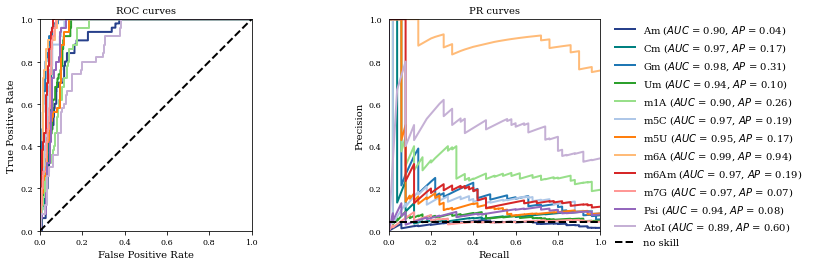

In [56]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(fig_width*2+1,fig_height+0.1))

for i, class_name in zip(range(num_task), RMs):
    axes[0].plot(data[str(i)]['fprs'], data[str(i)]['tprs'], color=colors[i],lw=lw)

    axes[1].plot(data[str(i)]['recalls'], data[str(i)]['precisions'], color=colors[i],lw=lw,
             label ='%s ($AUC$ = %.2f, $AP$ = %.2f)'%(class_name,
                        np.mean(data[str(i)]['auc']),np.mean(data[str(i)]['ap'])))
    
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.0])
axes[0].tick_params(axis='x',which='both',top=False)
axes[0].tick_params(axis='y',which='both',right=False)
axes[0].set_aspect('equal', adjustable='box')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC curves')

axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1])
    
    
axes[1].tick_params(axis='x',which='both',top=False)
axes[1].tick_params(axis='y',which='both',right=False,left=False,labelleft=True)
    
xmin, xmax = axes[1].get_xlim()
ymin, ymax = axes[1].get_ylim()   
axes[1].set_aspect(abs((xmax-xmin)/(ymax-ymin)), adjustable='box')

axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('PR curves')

axes[0].plot([0, 1], [0, 1], 'k--', lw=lw)
axes[1].plot([0, 1], [0.04, 0.04], 'k--', lw=lw, label = 'no skill')
axes[1].legend(loc='upper left', bbox_to_anchor=(1.05, 1),borderaxespad=0.,frameon=False)
fig.tight_layout()
fig.savefig('../Figs/unbalanced_data.pdf')